<a href="https://colab.research.google.com/github/DeshikReddy01/Task2/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded=files.upload()

Saving titanic.csv to titanic.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Select features and target
df = df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']]
df = df.dropna()  # drop missing values

X = df[['Age', 'Pclass', 'SibSp', 'Parch']]  # Features
y = df['Fare']  # Target


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 25.18
MSE: 3424.57
R2: 0.18


In [17]:
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)
feature_names=X.columns
for i in range(len(feature_names)):
  print(f"{feature_names[i]}:{model.coef_[i]}")

Intercept: 114.30429138488137
Coefficients: [ -0.17660283 -37.10325508   6.60004291  12.15713422]
Age:-0.17660282911566355
Pclass:-37.103255083263846
SibSp:6.600042906753064
Parch:12.157134222069969


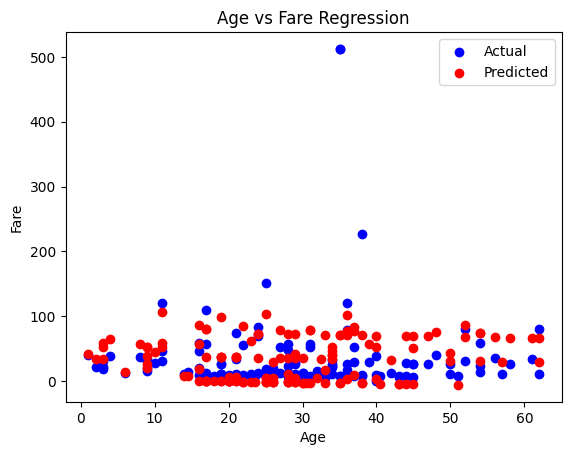

In [18]:
plt.scatter(X_test['Age'],y_test,color='blue',label='Actual')
plt.scatter(X_test['Age'],y_pred,color='red',label='Predicted')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare Regression')
plt.legend()
plt.show()